#### Gracie Longman F434523

# Part A

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

In [2]:
# Downloads and imports for question 1
import string
import pandas as pd
import nltk
from textblob import TextBlob
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('popular')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [3]:
# load_doc, clean_text functions were adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial1NLPcleanText.ipynb
# remove_dups and get_ids_ratings was my own work

def load_doc(filename, skip_header=False):
  '''Read the file'''
  # Check file extension
  if filename.endswith('.xlsx'):
      df = pd.read_excel(data_path+filename, header=None)
      df.dropna(inplace=True)
      lines = df.values.tolist()
  else:
      with open(data_path + filename, 'r') as file:
        if skip_header:
          next(file)
        lines = []
        for line in file:
            clean_line = line.strip()
            lines.append(clean_line)
  return lines

def remove_dups(text):
  '''Remove duplicates'''
  reviews=[]
  seen=[]
  # Loop through each review
  for review in text:
    # Check if line starts with numeric (i.e., an ID) followed by alphabetic
    match = re.match(r'^\d+(.+)$', review)
    if match:
      # Remove numeric (i.e. the id)
      rev_content = match.group(1).strip()
    else:
      # Can just use the whole line
      rev_content = review.strip()
    # Compare if the line has been seen or not
    if rev_content not in seen:
      seen.append(rev_content)
      reviews.append(review)
  return reviews

def clean_doc(text):
  '''Clean the text'''
  # split into words
  tokens = word_tokenize(text)
  # correct spelling mistakes
  corrected = [str(TextBlob(word).correct()) for word in tokens]
  # # stem words
  porter = PorterStemmer()
  stemmed = [porter.stem(word) for word in corrected]
  # convert to lower case
  tokens = [w.lower() for w in corrected]
  # remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  # remove remaining tokens that are not alphabetic or digit
  words = [word for word in stripped if word.isalnum()]
  # Remove short words but keep numbers
  words = [word for word in words if len(word) > 1 or word.isdigit()]
  # filter out stop words
  stop_words = stopwords.words('english')
  stop_words.remove('not') # I have decided to allow not
  words = [w for w in words if not w in set(stop_words)]
  return words

def get_ids_ratings_text(clean_text):
  '''Get ids, ratings and text'''
  clean_text = [clean_doc(doc) for doc in text]
  ids=[]
  ratings=[]
  for words in clean_text:
    #Store the ids and ratings
    ids.append(words[0])
    #only append numerical part
    rating = ''.join([char for char in words[-1] if char.isdigit()])  # Extract the number
    ratings.append(rating)

    #remove ids and ratings from the docs as this will not help analysis
    words.pop(0)
    if words:
      if isinstance(words[-1], str):
          # Check if last element contains alphabetic characters
          alpha_chars = ''.join([char for char in words[-1] if char.isalpha()])
          if alpha_chars:
              words[-1] = alpha_chars
          else:
              words.pop(-1)
  return ids, ratings, clean_text

# Label data path
data_path = "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"

# Load and clean data
text = load_doc("JewelleryReviewsLSA.csv", skip_header=True)
text = remove_dups(text)
ids, ratings, clean_text = get_ids_ratings_text(text)

print(ids)
print(ratings)
print(clean_text)

['32767', '15959', '43515', '30720', '1816', '265', '54548', '28250', '30773', '11856', '2185', '36727', '11087', '535', '32496', '44534', '48216', '50609', '50640', '50650', '27858', '21185', '22946', '9050', '44591', '24452', '12483', '56342', '33009', '37896', '51030', '13559', '52663', '39606', '2520', '33813', '42026', '51396', '45548', '45856', '33746', '3865', '42077', '53750', '39496', '33858', '17442', '47910', '58595', '23979', '39620', '3978', '34483', '48781', '6421', '53693', '28474', '49855', '10209', '49720', '25080', '43839', '40749', '6522', '34529', '19647', '45289', '33620', '14499', '1185', '56679', '50467', '27793', '34266', '48772', '30926', '42604', '11269', '9441', '18988', '19548', '25378', '10535', '57009', '45203', '6135', '44135', '20090', '8110', '32674', '4375', '41889', '51907', '38305', '22058', '10612', '17166', '36164', '58481', '26246', '2033', '48779', '34523', '9726', '56494', '49525', '45278', '35694', '41876', '17309', '11135', '17273', '11247', '

# Question 2 - Information retrieval


In [4]:
# Installations and imports for question 2
!pip install faiss-cpu
import numpy as np
from numpy import argsort
import scipy.sparse as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn import metrics
import torch
import torch.nn as nn
import transformers
from transformers import DistilBertModel, DistilBertTokenizerFast
from transformers import AdamW
import torch.nn.functional as F
import faiss
import warnings
warnings.filterwarnings('ignore')

#### Evaluation functions. Used for both LSI and Neural Information Retrieval


In [5]:
# My own knowledge

import matplotlib.pyplot as plt

def calc_prec_rec_at_k(relevant_ids, retrieved_ids, k_values):
  '''Calculate precision and recall at different threshold values'''
  # Data stores
  prec_at_k = []
  rec_at_k = []

  # Edge case
  if len(relevant_ids) == 0:
    return [0] * len(k_values), [0] * len(k_values)

  # Calc precision and recall for different cut off (k values)
  for k in k_values:
    retrieved_ids_k = retrieved_ids[:k]
    tp_k = len(set(relevant_ids) & set(retrieved_ids_k))

    prec_at_k.append(tp_k / k)
    rec_at_k.append(tp_k / len(relevant_ids))

  return prec_at_k, rec_at_k

def plot_eval_curve(eval_dict):
  '''Plot precision-recall curve'''
  fig, ax = plt.subplots()

  for method in eval_dict.keys():
    ax.scatter(eval_dict[method][0], eval_dict[method][1], s=5)
    ax.plot(eval_dict[method][0], eval_dict[method][1], label = method)

  plt.legend()
  ax.grid(alpha=0.5)
  ax.set(xlabel='Average Recall', ylabel='Average Precision', title = 'Standard Average Recall/Precision Curve')

## Latent Semantic Indexing



Mean avg precision tfidf: 0.66
Mean avg precision log: 0.67
Mean avg precision boolean: 0.66
Mean avg precision bm25: 0.69
Area under precision/recall curve for method tfidf: 0.54
Area under precision/recall curve for method log: 0.50
Area under precision/recall curve for method boolean: 0.51
Area under precision/recall curve for method bm25: 0.55


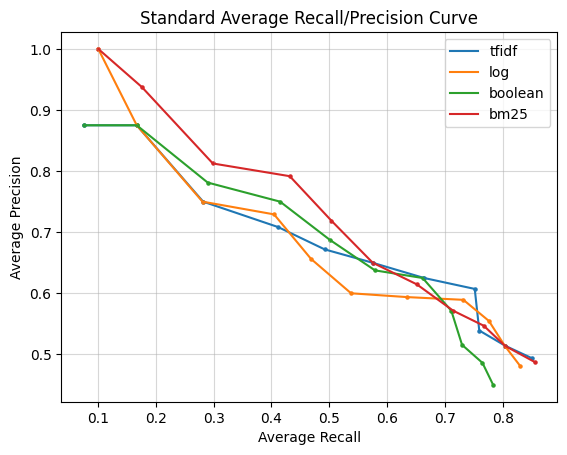

In [57]:
# The skeleton of this code was adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial4LSA.ipynb

def get_vocab(clean_docs):
  '''Use sklearn Count Vectorizer to get vocabulary, using unigrams and bigrams '''
  clean_docs = [' '.join(doc) for doc in clean_docs]
  vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2, max_df=0.95)
  vectorizer.fit(clean_docs)
  return vectorizer.vocabulary_

def encode_data(train_docs, mode, vocab):
  '''Vectorize data then encode.
     Four different modes possible: tfidf, log, boolean, BM25'''
  vectorizer = CountVectorizer(vocabulary=vocab, ngram_range=(1,2))
  count_vectors = vectorizer.fit_transform(train_docs)

  if mode == "tfidf":
    # Tf-Idf encoding
    transformer = TfidfTransformer(norm='l2')
    Xtrain = transformer.fit_transform(count_vectors)

  elif mode == 'log':
    # Term freq
    Xtrain = np.log1p(count_vectors)
    # Document freq
    idf = sp.diags(TfidfTransformer(norm=None, use_idf=True).fit(count_vectors).idf_,0)
    Xtrain=Xtrain.dot(idf)
    # Document length normalise
    Xtrain = normalize(Xtrain, norm='l2', axis=1)

  elif mode == 'boolean':
    # Term freq
    Xtrain = normalize((count_vectors > 0).astype(int), norm='l2', axis=1)
    # Document freq
    idf = sp.diags(TfidfTransformer(norm=None, use_idf=True).fit(count_vectors).idf_,0)
    Xtrain=Xtrain.dot(idf)
    # Document length normalise
    Xtrain = normalize(Xtrain, norm='l2', axis=1)

  elif mode == 'bm25':
    # Using TfidfVectorizer with BM25 parameters
    bm25_vectorizer = TfidfVectorizer(vocabulary=vocab, ngram_range=(1,2),
                            norm=None, use_idf=True,
                            smooth_idf=False, sublinear_tf=True)
    Xtrain = bm25_vectorizer.fit_transform(train_docs)
  else:
    raise ValueError(f"Unsupported mode: {mode}. Use 'tfidf', 'log', 'boolean', or 'bm25'")

  return Xtrain

def prepare_query(query, mode, vocab, encoded=True):
  '''Clean then encode query'''
  if len(query) == 2:
    query.pop(0) # dont need query number
  tokens = clean_doc(str(query))
  line = ' '.join(tokens)
  if encoded:
    encoded = encode_data([line], mode, vocab)
    return encoded
  else:
    return line

#Get vocab, read in necessary files
vocab = get_vocab(clean_text)
query_list = load_doc("QueryText.csv.xlsx")
query_relevant = pd.read_csv(data_path + "JewelleryReviewsQueryRelevantID.csv")
train_docs = [' '.join(doc) for doc in clean_text]

# Data stores
k_values = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
MAPs = []
method_avg_curves = {}

# Loop through each method, and query
# Calculate precision and recall at diff ks for eachs step
for method in ['tfidf', 'log', 'boolean', 'bm25']:
  lsi_precision_curves = []
  lsi_recall_curves = []

  # encode training data according to method
  Xtrain = encode_data(train_docs, method, vocab)
  trunc_SVD_model = TruncatedSVD(n_components=50)
  approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)

  for query, q in zip(query_list, range(0, len(query_list))):
    # prepare each query and query_vector in list according to method
    encoded_query = prepare_query(query, method, vocab)
    query_vector = trunc_SVD_model.transform(encoded_query)
    similarities = cosine_similarity(approx_Xtrain, query_vector)

    # sort by similarity
    indexes = np.argsort(similarities.flat)[::-1]
    retrieved_ids = [int(ids[i]) for i in indexes]

    query_relevant_ids = query_relevant.iloc[:,q].dropna().astype(int).tolist()

    # Calculate evaluation metrics
    prec_at_k, rec_at_k = calc_prec_rec_at_k(query_relevant_ids, retrieved_ids, k_values)
    lsi_precision_curves.append(prec_at_k)
    lsi_recall_curves.append(rec_at_k)

  avg_precision_curve = np.mean(lsi_precision_curves, axis=0)
  avg_recall_curve = np.mean(lsi_recall_curves, axis=0)
  method_avg_curves[method] = (avg_recall_curve, avg_precision_curve)
  MAPs.append(sum(avg_precision_curve)/len(avg_precision_curve))

# Output results
plot_eval_curve(method_avg_curves)

for i, method in enumerate(method_avg_curves.keys()):
  print(f'Mean avg precision {method}: {MAPs[i]:.2f}')

for method in method_avg_curves.keys():
  print(f'Area under precision/recall curve for method {method}: {metrics.auc(method_avg_curves[method][0], method_avg_curves[method][1]):.2f}')

In [7]:
print(vocab)

{'expect': 204, 'like': 311, 'regular': 504, 'size': 621, 'ring': 515, 'one': 412, 'look': 324, 'toy': 690, 'something': 638, 'funny': 238, 'rings': 569, 'may': 365, 'diamond': 162, 'king': 301, 'ask': 39, 'white': 728, 'old': 411, 'ring one': 549, 'look like': 327, 'like ring': 316, 'ring may': 544, 'ordered': 422, 'toe': 684, 'description': 159, 'came': 89, 'quickly': 486, 'not': 393, 'nt': 405, 'know': 302, 'anyone': 31, 'please': 453, 'seller': 591, 'wedding': 724, 'band': 47, 'thumb': 677, 'ordered ring': 423, 'ring came': 525, 'came quickly': 90, 'toe ring': 685, 'ring nt': 548, 'size toe': 622, 'wedding band': 725, 'ring thumb': 565, 'thumb ring': 678, 'beautiful': 51, 'first': 223, 'shipment': 601, 'scratches': 584, 'missing': 372, 'diamonds': 166, 'shoulder': 607, 'returned': 508, 'replacement': 506, 'second': 586, 'even': 189, 'worse': 745, 'clearly': 105, 'visible': 706, 'scratch': 581, 'right': 513, 'middle': 368, 'black': 68, 'great': 256, 'time': 679, 'refund': 502, 'than

### LSI comments
From the graph we can see that all four methods performed comparably, with BM25 having the best balance between precision and recall with the largest area on the curve at 0.55, and a mean avg precision of 0.69 but not by a lot.

Precision starts high (around 1.0, when k = 1 some methods are able to retrieve the correct relevant document) but decreases to approximately 0.5 once k = 20.

## Neural Information Retreival

#### Prepare the dataset for training
- Extract the ids [8x193]
- Extract the relevant/not relevant labels for each query [8x193]
- Using the ids to index the location of the doc in `clean_text` extract the docs [8x193]

This produces an easily indexible list of lists, with index 0 corresponding to ids, relevancy labels and docs for query 1 and so on

In [8]:
# My own knowledge
pos_ids = [query_relevant[query].dropna().astype(int).to_list() for query in ['Query1', 'Query2', 'Query3', 'Query4', 'Query5', 'Query6', 'Query7', 'Query8']]

ir_ids =[[] for _ in range(8)]
ir_labels= [[] for _ in range(8)]
for i, query in enumerate(['Query1', 'Query2', 'Query3', 'Query4', 'Query5', 'Query6', 'Query7', 'Query8']):
  # Relevant ids for each query
  rels = pos_ids[i]
  # Loop through all ids
  for id in ids:
    # Append to id list, and if relevant append 1 to labels
    id = int(id)
    if id in rels:
      ir_ids[i].append(id)
      ir_labels[i].append(1)
    else:
      ir_ids[i].append(id)
      ir_labels[i].append(0)

# Now want to get the actual texts that correspond to the ids in the pos and neg lists
ir_idxs = [[] for _ in range(8)]
ir_text = [[] for _ in range(8)]
for i in range(8):
  # Get the location of each relevant id
  ir_idxs[i].append([ids.index(str(id)) for id in ir_ids[i]])
  # Use that to index the documents
  ir_text[i].extend([clean_text[idx] for idx in ir_idxs[i][0]])

#### Train the dataset. Due to time, data and memory constraints, this model was only trained using one batch of ten data points for arbitrarily chosen query 7 -  so it probably didn't particularly help the model performance - but good practise

In [9]:
# This code was adapted from https://huggingface.co/transformers/v3.0.2/training.html

def loss(query_emb, emb, labels, margin=0.2):
  '''Use the Cosine embedding loss function '''
  # Extract embeddings (CLS token)
  query_emb = query_emb.last_hidden_state[:, 0, :]
  emb = emb.last_hidden_state[:, 0, :]

  # Get target labels for CosineEmbeddingLoss (-1 for negative, 1 for positive)
  target = torch.where(labels == 1, torch.tensor(1.0), torch.tensor(-1.0))

  # CosineEmbeddingLoss
  loss_fn = nn.CosineEmbeddingLoss(margin=margin)

  # Calculate loss
  loss = loss_fn(query_emb, emb, target)
  return loss

# Load the Pre-trained distilBERT model
checkpoint = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(checkpoint)
model = DistilBertModel.from_pretrained(checkpoint)

# Init optimiser
optimizer = AdamW(model.parameters(), lr=1e-5)

# Data - chose query 7 arbitrarily for training
text_batch = [' '.join(t) for t in ir_text[6]]
labels = ir_labels[6]
query = query_list[6]

# Batch data (time and mem constraints, would normally use a larger proportion)
text_batch = text_batch[159:169] #include some relevant docs as well
labels = labels[159:169]

# Tokenize data
t_encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
q_encoding = tokenizer(query, return_tensors='pt', padding=True, truncation=True)

# Forward pass over the model
emb = model(**t_encoding)
quer_emb = model(**q_encoding)

# Train model
loss = loss(quer_emb, emb, torch.tensor(labels))
loss.backward()
optimizer.step()

# Save model
torch.save(model.state_dict(), "distilbert_retrieval.pth")

#### Load in the model

In [10]:
model_bert = DistilBertModel.from_pretrained(checkpoint)
model_bert.load_state_dict(torch.load("distilbert_retrieval.pth", weights_only=True))

<All keys matched successfully>

#### Now ready to do the actual retrieval:

In [58]:
# embed_text function https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial6UsingBERTfortheFirstTime.ipynb
# faiss https://github.com/facebookresearch/faiss/wiki/getting-started
# Method https://medium.com/@mhammadkhan/neural-re-ranking-models-c0a67278f626


def embed_text(texts, max_length=512):
  '''Use the trained bert model to embed texts - get the CLS token '''
  # Tokenize text and pad
  tokenized = tokenizer(texts, add_special_tokens=True, padding=True,
                        truncation=True, max_length=max_length, return_tensors="pt")
  # Get embeddings
  with torch.no_grad():
    last_hidden_states = model_bert(**tokenized)
  embeddings = last_hidden_states[0][:, 0, :].numpy()

  return embeddings

def build_faiss_index(embeddings):
  '''Build a faiss index to store the embeddings, its faster for lookups '''
  index = faiss.IndexFlatL2(embeddings.shape[1])
  index.add(embeddings)
  return index

def retreive(query, index, top_k):
  '''Retrieve top_k docs by their ids'''
  # Embed query and search the faiss index for close docs
  query_embedding = embed_text(query)
  distances, indexes = index.search(query_embedding, top_k)
  return [int(ids[i]) for i in indexes[0]]

def rerank(query, retrieved_ids, top_k=10):
  '''Re rank retrieved docs using the cosine distance '''
  # Embed query and retrieved docs
  query_embedding = embed_text(query)  # Embed the query

  retrieved_idxs = np.where(np.isin(ids, retrieved_ids))[0]  # Get indexes of retrieved doc ids
  retrieved_texts = [texts[i] for i in retrieved_idxs] # Get the retrieved docs
  retrieved_texts = [' '.join(t) for t in texts] # format

  retrieved_embeddings = embed_text(retrieved_texts)  # Embed the retrieved documents

  # Compute cosine similarity between query and each retrieved document
  similarities = cosine_similarity(query_embedding, retrieved_embeddings)

  # Get the indices of the retrieved docs based on similarity
  reranked_idxs = np.argsort(similarities[0])[::-1]
  reranked_ids = [ids[i] for i in reranked_idxs]

  return reranked_ids

# Prepare texts, embed them, and store the embeddings in the faiss index
texts = [' '.join(t) for t in text]
embeddings = embed_text(texts)
faiss_index = build_faiss_index(embeddings)

# Data stores
precision=[]
recall=[]

# Loop through each query
for query, q in zip(query_list, range(0, len(query_list))):
  #Retrieve and re rank ids
  retrieved_ids = retreive(query, faiss_index, 30)
  reranked_ids = rerank(query, retrieved_ids)

  query_relevant_ids = query_relevant.iloc[:,q].dropna().astype(int).tolist()

  # Calculate Evaluation metrics
  prec_at_k, rec_at_k = calc_prec_rec_at_k(query_relevant_ids, retrieved_ids, k_values)
  precision.append(prec_at_k)
  recall.append(rec_at_k)

avg_precision = np.mean(precision, axis=0)
avg_recall = np.mean(recall, axis=0)
MAP = (sum(avg_precision)/len(avg_precision))

# Output reuslts
plot_eval_curve({'NIR': (avg_recall, avg_precision)})

print(f'Mean avg precision {method}: {MAP:.2f}')
print(f'Area under precision/recall curve for method DistilBert NIR: {metrics.auc(avg_recall, avg_precision):.2f}')

### Neural Information Retrieval model comments

Evidently the LSI model performed much better. The model was only trained on ten data points for question 7 making it unlikely to be able to generalise well. The neural retrieval precision/recall graph has a much lower precision

# Question 3
## Clustering


### Imports for clustering and relevant functions

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

def closest_docs_to_centroid(text_vecs, centroids, labels):
  #calc distances from each doc to each centroid
  distances = cdist(text_vecs, centroids, 'cosine')

  closest_docs=[]
  for i in range(len(centroids)):
    cluster_docs_idx = np.where(labels == i)[0]

    closest_doc_idx = np.argsort(distances[cluster_docs_idx, i])
    sorted_closest_docs = cluster_docs_idx[closest_doc_idx]
    closest_docs.append(sorted_closest_docs[:5])

  return closest_docs

def cluster_wrapper(method, data, n_clusters):
  if method == 'agglom':
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average').fit(data)
    return clustering
  elif method == 'kmeans':
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    return kmeans

### We know from the graph that LSI with BM25 encoding works the best - so lets use that - with arbitrarily chosen query 3
This is just a repeat of the above LSI code without the loops and metric calculations

In [60]:
# As stated above, adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial4LSA.ipynb

Xtrain = encode_data(train_docs, 'bm25', vocab)
trunc_SVD_model = TruncatedSVD(n_components=50)
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)

# prepare each query and query_vector in list according to method
encoded_query = prepare_query(query_list[2], 'bm25', vocab)
query_vector = trunc_SVD_model.transform(encoded_query)
similarities = cosine_similarity(approx_Xtrain, query_vector)

# sort by similarity
indexes = np.argsort(similarities.flat)[::-1]
retrieved_ids = [int(ids[i]) for i in indexes]

#store appropriate retrieved doc vectors
retrieved = [approx_Xtrain[i] for i in indexes]

### Now ready to start clustering

In [61]:
# My own knowledge with help from docs https://scikit-learn.org/stable/

#chosen query, lsi with bm25 normalisation
top_100 = retrieved[:100]
top_100_ids = retrieved_ids[:100]
n_clus=30

#scale input data
scaler = MinMaxScaler()
top_100_sc = scaler.fit_transform(top_100)

ss_score=[[],[]]
db_score=[[],[]]
ssd_score=[[],[]]

#calculate clusters, store results
for method in ['agglom', 'kmeans']:
  for n_clusters in range(3,n_clus):
    clusters = cluster_wrapper(method, top_100_sc, n_clusters)
    #select best features
    selector = SelectKBest(f_classif, k=1000)
    X_selected = selector.fit_transform(top_100, clusters.labels_)
    #re cluster
    clusters = cluster_wrapper(method, X_selected, n_clusters)

    if method == 'agglom':
      ss_score[0].append(silhouette_score(top_100, clusters.labels_, metric='cosine'))
      db_score[0].append(davies_bouldin_score(top_100, clusters.labels_))

    else:
      ss_score[1].append(silhouette_score(top_100, clusters.labels_, metric='cosine'))
      db_score[1].append(davies_bouldin_score(top_100, clusters.labels_))
      ssd_score[1].append(np.sum(clusters.inertia_))

cluster_scores = pd.DataFrame({'n_clusters':range(3,n_clus),
                               'ss_agglom':ss_score[0], 'ss_kmeans':ss_score[1],
                               'db_agglom':db_score[0], 'db_kmeans':db_score[1],
                               'ssd_kmeans':ssd_score[1]})


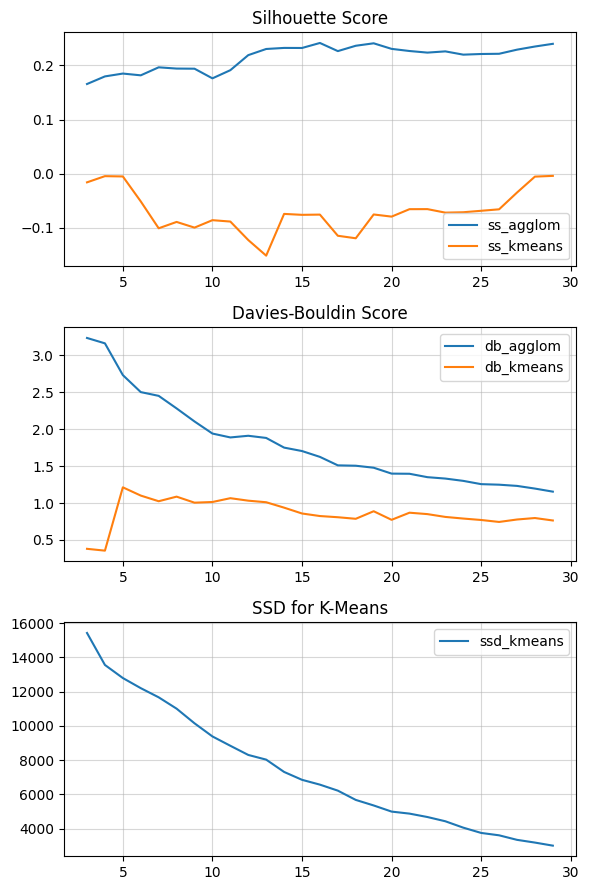

In [62]:
# My own knowledge

# Plot each metric
fig, ax = plt.subplots(3, 1, figsize=(6,9))
metrics = [('ss_agglom', 'ss_kmeans'), ('db_agglom', 'db_kmeans'), ('ssd_kmeans', None)]
titles = ['Silhouette Score', 'Davies-Bouldin Score', 'SSD for K-Means']

for i, (m1, m2) in enumerate(metrics):
    ax[i].plot(cluster_scores['n_clusters'], cluster_scores[m1],label=m1)
    if m2: ax[i].plot(cluster_scores['n_clusters'], cluster_scores[m2],label=m2)
    ax[i].set_title(titles[i])
    ax[i].legend(), ax[i].grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [63]:
# https://www.geeksforgeeks.org/what-are-some-common-methods-for-determining-the-optimal-number-of-clusters/

# Choose the best num of clusters based on silhouette scores
best_n_agglom = cluster_scores.iloc[cluster_scores['ss_agglom'].idxmax()]['n_clusters']
best_n_kmeans = cluster_scores.iloc[cluster_scores['ss_kmeans'].idxmax()]['n_clusters']

print(f"Best n_clusters for Agglomerative Clustering: {best_n_agglom}")
print(f"Best n_clusters for K-Means: {best_n_kmeans}")

Best n_clusters for Agglomerative Clustering: 16.0
Best n_clusters for K-Means: 29.0


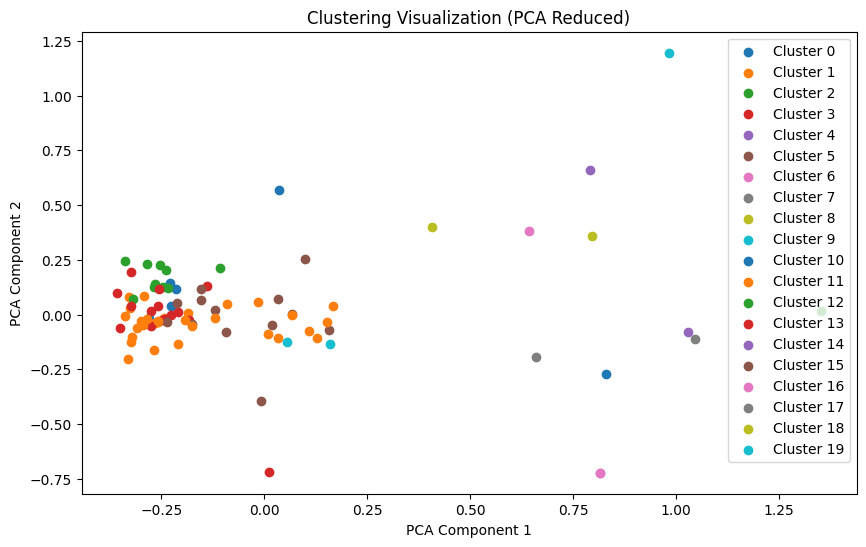

In [64]:
# My own knowledge with help from docs https://scikit-learn.org/stable/

clusters = KMeans(n_clusters=int(best_n_kmeans)).fit(top_100_sc)

# Reduce dims
X_reduced = PCA(n_components=2).fit_transform(top_100_sc)

# Scatter plot
plt.figure(figsize=(10, 6))
for i in range(20):
    plt.scatter(X_reduced[clusters.labels_ == i, 0], X_reduced[clusters.labels_ == i, 1], label=f'Cluster {i}')

plt.legend()
plt.title("Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### Print the top 5 closest docs to each centroid

In [65]:
# My own knowledge
# Calc closest docs to each centroid
closest_idxs = closest_docs_to_centroid(top_100_sc, clusters.cluster_centers_, clusters.labels_)

# Print
for i in range(int(best_n_kmeans)):
    print(f'Agglom cluster {i}: {np.sum(clusters.labels_ == i)}')
    for idx in closest_idxs[i]:
        print(f'Rating : {ratings[idx]} Review: {" ".join(clean_text[idx])}')
    print(50*'-')

Agglom cluster 0: 5
Rating : 2 Review: wanted know ring like 2 rings one ring beyond gorgeous love
Rating : 4 Review: nice small sized ring stick rings different looks
Rating : 3 Review: ring pretty enough metal ring substantial pushes easily
Rating : 5 Review: owned triple roll ring three rings slowly broke purchased far none individual rings broken yet
Rating : 3 Review: ring pretty flexible turned good ordered ring finger size made look better pink ring
--------------------------------------------------
Agglom cluster 1: 11
Rating : 4 Review: product came fast like amazon explained ring clearly written war thick likebut guess like small rings ring
Rating : 5 Review: love ring shines beautiful looks real anyone like buy one ring stones good size friends love ring could pass real diamond love ring worth money better ring bought von silver cubic shine ring ring bought 3 stones worth price anne marie
Rating : 3 Review: first skeptically ring price low nt wear lot gold purchased ring nic

#### Print each cluster with more than 5 docs - this is what will be used for clustering

In [66]:
# My own knowledge

# Want all the docs in clusters w n >=5
docs_in_clusters = [np.where(clusters.labels_==i) for i in range(int(best_n_kmeans))]
count_docs_in_clusters = [len(docs_in_clusters[i][0]) for i in range(int(best_n_kmeans))]

#Store index of each cluster n>=5
counts=[]
for i, count in enumerate(count_docs_in_clusters):
  if count>=5:
    counts.append(i)

cluster_text_list=[[] for _ in counts]

for j,i in enumerate(counts):
  print(f'Cluster {i}: {np.sum(clusters.labels_ == i)}')
  for idx in docs_in_clusters[i][0]: #idx is the index for the doc location in top_100, not in clean_text which is what we want
    #so get the actual id and convert to string
    clean_text_ids = top_100_ids[idx]
    clean_text_ids = str(clean_text_ids)
    # Then get the index in clean_text - now can access the doc
    clean_text_idx = ids.index(clean_text_ids)

    # Store doc and print
    cluster_text_list[j].append(" ".join(clean_text[clean_text_idx]))
    print(f'Rating : {ratings[clean_text_idx]} Review: {" ".join(clean_text[clean_text_idx])}')

  print(50*'-')

Cluster 0: 5
Rating : 5 Review: great gift loved one ever better seller seller deals professional way security measures superb
Rating : 5 Review: product made great gift great memories love something always helping gift heart always shows care
Rating : 5 Review: love ring fits right showed daughter ring loved well great everyday wear price great
Rating : 4 Review: always love pillow free make great gifts great people life quite collection hope continue build
Rating : 5 Review: mother loved great birthday gift look even better person go great anything
--------------------------------------------------
Cluster 1: 11
Rating : 1 Review: product hollow not clearly specified item description not expecting seemed poor quality returned item
Rating : 5 Review: impressed quality item delivery fast would definitely buy seller again
Rating : 5 Review: flute charm detailed high quality see keys flute fan would adore item
Rating : 1 Review: item not pictured funny poor quality seller not respond con

## Comments on results
Looking at the PCA cluster visualisation, the data itself is not too well clustered, with several lone points scattered on the graph. This explains the model's confusion, and why it assigned only one point to several different centroids. Generally, there appears to be four or five clusters with more than 5 docs, and these are the main clusters.

Every time this algorithm is run, it provides slightly different results. Therefore I chose to hard code the clusters I used for summarisation below. Additionally, because of the volume of clusters with only one point, I chose to only summarise the clusters with 5 or more docs.

# Question 4
# Summarisation
### Extractive method = SBert
### Abstractive method = Seq2Seq


In [22]:
# Imports and Downloads
!pip install -U -q sentence-transformers
!pip install bert-extractive-summarizer
!pip install -U evaluate
!pip install setuptools==65.5.0
!pip install -U rouge_score
!pip install -U nltk
!pip install datasets
from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, AutoTokenizer
import evaluate
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datasets import Dataset
from transformers import AdamWeightDecay
from transformers.keras_callbacks import KerasMetricCallback
from summarizer.sbert import SBertSummarizer
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Download necessary NLTK data
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [23]:
# Hard coded clusters, as generated above
cluster_text_list = [['arrived estimated date many previous orders seller always time excellent condition', 'happy product received advertised timely manner selleramazon kept updated shipmentdelivery status would recommend item seller', 'stem great quality came promptly happy recommend undeservedly', 'purchased several items petya not products first rate packing customer service excellent', 'product arrived short period time perfect described perfectly everything hoped', 'product received nice came timely matter faster expected order item again', 'neck ring timely manner looks antique would recommend ring garden lover', 'received italian horn printing condition completely satisfied receiving product timely manner', 'product arrived perfect condition shipping ridiculously slow not order again', 'product came fast like amazon explained ring clearly written war thick likebut guess like small rings ring', 'earrings described transaction smooth easy product shipped received time frame quoted pleased purchase', 'stem shipped received within time limit given good quality product t', 'item came quickly plenty time christmas huge hit person received them', 'wonderful shopping experience purchased item holiday presents whole order came quickly wonderful condition', 'works perfectly rings wider rings narrow wide', 'always wanted claddaugh ringhis price greati love it', 'message positive looks pretty bought aunt present color nice', 'pleased purchase speedy shipping use', 'ring perfect say spend thousands nt ring shines perfectly love ring', 'great way support local pro sports team without wearing oversized jersey hat mess hair', 'nt like product diamonds looked nothing like picture diamonds flowed little bit', 'looked well picture thing could say little polished looks like black stands looks nice', 'wore toe ring one day poof stone gone sits pile broken sterling silver rings things', 'ring lovely advertised pink ring actually wear thumb ring', 'gorgeous ring holder sits dresser holds wedding ring every night gorgeous love', 'really liked earrings however agree one earlier reviews thought would little bigger', 'vice ring expensive ring one stone missing not worth returning would pay postage ring cost'], ['got 3 belly rings 3 tongue rings 3 lip rings fig car stuff got cool love pink peace sign tongue ring complaint got 2 yellow lip rings not much yellow overall happy', 'got ring gift boyfriend love thing rings not position correctly inches skin', 'ought ring thumb ring everyone notices comments pretty cool looks spin want know got would recommend ring one also come', 'owned several claddagh rings years lost last one received one gift recently truly love sturdy design crisp easily recommend one lovely ring', 'second engagement king got birthday love nice shiny must buy ring anyone', 'ring absolutely stunning beautiful would recommend amethyst ring anyone market reasonably prices amethyst ring'], ['told ring comfortable wear quite surprised please see masonic ring titanic', 'peasant classify best casual wear wear weekend nt not suited work going events', 'love ring not ring would want wear everyday ring claws hold stone sharp get stuck things scratched me', 'item perfect daily wear still elegant enough dress receive many compliments wearing it', 'good everyday wear dressing up', 'serves purpose seemed image lot prettier sparkling turned wear shirt since not compliment anything wear', 'nice wear want something casual wear comfortable', 'unique pleasure wear stones catch light style comfortable wear', 'not thought going look good picture got quality nt ca nt wear completely bending hooks shape like silver plastic', 'wear charm memory 3 friends passed away wish nt wear honor do', 'hard ca nt wear material hard not easy wear nt like saved money got', 'days not wear blue one wear one really enjoy wearing something celtic pretty'], ['impressed quality would not hesitate purchase items seller service also exceptional', 'product hollow not clearly specified item description not expecting seemed poor quality returned item', 'impressed quality item delivery fast would definitely buy seller again', 'stem arrived extremely damaged several places not package well send back disappointed quality', 'item not pictured funny poor quality seller not respond contracted this', 'quality look not anticipated fliesi would not recommend item', 'flute charm detailed high quality see keys flute fan would adore item', 'disappointed quality item fragile thin discoloured back charm not returnable not ordering amazon jeweller future thank you', 'item wonderful surprise quality much could ever hoped for', 'king way small looks like toy putting would not recommend want nice 12 cart ring', 'pleased quality item definitely recommend addition friends family', 'attractive high quality item young teenager small adult', 'quality item not expectationsthe top scratched hinges not line predrilled holes staining inconsistent saw item store would not purchased', 'week one jewels fell wing metal already vanishing spend money higher quality item', 'item misrepresented size quality horrible would return item except family member coast guard sent total waste money'], ['great gift loved one ever better seller seller deals professional way security measures superb', 'birthday gift 16 niece loves ring happy received it', 'product made great gift great memories love something always helping gift heart always shows care', 'love ring fits right showed daughter ring loved well great everyday wear price great', 'wife loves ring great gift extremely cheap high quality', 'always love pillow free make great gifts great people life quite collection hope continue build', 'nice loves birth stone got christmas lifti also love also great', 'ring good sparkle looks like ring cost six amount takes great gift someone budget girlfriend loves it', 'got ring promise ring girlfriend christmas loved definitely great value', 'love birthstone wanted piece jewel symbolized simple purity blue opal ring gift birthday year definitely great gift welcomed addition collection', 'mother loved great birthday gift look even better person go great anything', 'bought ring husband loved received said would great ring', 'bought gift friends birthday loved beautiful ring']]

# Extractive ref sums generated by Claude 13/03/2025
extractive_ref_sums = [
    'Product received nice came timely matter faster expected order item again. Earrings described transaction smooth easy product shipped received time frame quoted pleased purchase. Wonderful shopping experience purchased item holiday presents whole order came quickly wonderful condition.',
    'Ought ring thumb ring everyone notices comments pretty cool looks spin want know got would recommend ring one also come. Owned several claddagh rings years lost last one received one gift recently truly love sturdy design crisp easily recommend one lovely ring. Ring absolutely stunning beautiful would recommend amethyst ring anyone market reasonably prices amethyst ring.',
    'Item perfect daily wear still elegant enough dress receive many compliments wearing it. Nice wear want something casual wear comfortable. Unique pleasure wear stones catch light style comfortable wear.',
    'Impressed quality would not hesitate purchase items seller service also exceptional. Flute charm detailed high quality see keys flute fan would adore item. Item wonderful surprise quality much could ever hoped for.',
    'Great gift loved one ever better seller seller deals professional way security measures superb. Ring good sparkle looks like ring cost six amount takes great gift someone budget girlfriend loves it. Love birthstone wanted piece jewel symbolized simple purity blue opal ring gift birthday year definitely great gift welcomed addition collection.'
]


# abstractive ref sums generated by Claude 13/03/2025
abstractive_ref_summaries = [
    'Products arrive on time and in excellent condition, with customers generally satisfied with shipping speed and product quality. Most reviewers express high satisfaction with the rings, earrings and other jewelry items, highlighting their appearance and value. While most customers are pleased with their purchases, a small minority report quality issues such as missing stones or differences from product images. Several customers specifically praise the timely delivery and recommend both the products and sellers, appreciating the customer service and transaction experience.',
    'Customers express strong satisfaction with their ring purchases, often buying them as gifts or for personal use. Reviewers consistently highlight the visual appeal of the rings, with multiple customers mentioning receiving compliments from others. The claddagh rings are particularly appreciated for their sturdy design, while amethyst rings are noted for being reasonably priced and stunning. Overall, the body jewelry and rings in this cluster receive enthusiastic recommendations from buyers.',
    'Reviews focus primarily on the wearability of jewelry items, with mixed experiences. Some customers find their purchases comfortable and suitable for daily wear, even receiving compliments. Others express disappointment with comfort issues, mentioning sharp stone settings that get caught on clothing or scratch skin. Several reviewers categorize their items as casual everyday pieces versus those appropriate for dressing up. Celtic-themed jewelry receives positive mentions for its uniqueness, while some items are criticized for poor quality materials that affect wearability.',
    'Reviews in this cluster center on product quality with sharply divided opinions. Satisfied customers praise the high quality, detailed craftsmanship, and fast delivery of their purchases, often expressing willingness to buy from the same sellers again. Dissatisfied customers describe items as hollow, fragile, thin, or damaged upon arrival. Several reviewers mention discrepancies between product images and the actual items received. Poor packaging, discoloration, and missing jewels are common complaints, with some customers expressing regret over their purchases and reluctance to order similar items in the future.',
    'Reviews predominantly discuss jewelry as gifts, with overwhelmingly positive feedback. Customers frequently purchase rings as birthday, Christmas, or promise gifts for loved ones, reporting that recipients love the items. Many reviewers highlight the good value, noting that the rings look more expensive than their actual cost. Birthstone jewelry is specifically mentioned as meaningful gifts with symbolic value. Several customers mention that the items look even better in person than in pictures and pair well with various outfits. The cluster reflects high satisfaction with jewelry items as thoughtful, well-received gifts.'
]


In [24]:
# https://github.com/gcosma/COP509/blob/main/LabSolutions/Lab_Exercise_(No_6).ipynb

def evaluate_summarisation(summaries, extractive_ref_sums):
  '''Returns the average rouge1, rouge2, rougeL, meteor and bleu scores'''

  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

  rouge1, rouge2, rougeL, meteor, bleu=[],[],[],[],[]
  for i, (sum, ref) in enumerate(zip(summaries, extractive_ref_sums)):

    scores = scorer.score(sum, ref)
    rouge1.append(scores['rouge1'].fmeasure)
    rouge2.append(scores['rouge2'].fmeasure)
    rougeL.append(scores['rougeL'].fmeasure)

    ref_tokens = word_tokenize(ref)
    sum_tokens = word_tokenize(sum)
    meteor.append(meteor_score([ref_tokens], sum_tokens))
    bleu.append(sentence_bleu([ref], sum, smoothing_function=SmoothingFunction().method1))

  return np.mean(rouge1), np.mean(rouge2), np.mean(rougeL), np.mean(meteor), np.mean(bleu)

def plot_eval_graph(scores_dict):
    '''Plot bar graph of all scores'''
    # Extract scores
    metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'METEOR', 'BLEU']
    extractive_scores = scores_dict.get('Extractive', (0, 0, 0, 0, 0))
    abstractive_scores = scores_dict.get('Abstractive', (0, 0, 0, 0, 0))
    abstractive_pruned = scores_dict.get('Abstractive_pruned', (0, 0, 0, 0, 0))

    # Format widths
    x = np.arange(len(metrics))
    width = 0.25  # Adjusted for proper spacing

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars
    bars1 = ax.bar(x - width, extractive_scores, width, label='Extractive', color='pink')
    bars2 = ax.bar(x, abstractive_scores, width, label='Abstractive', color='purple')
    bars3 = ax.bar(x + width, abstractive_pruned, width, label='Abstractive_pruned', color='skyblue')

    # Aesthetics
    ax.set_xlabel('Evaluation Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Extractive vs. Abstractive using Metrics (Avg across all clusters)')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    ax.grid(alpha=0.5)

    # Add value labels on bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),  # Center text above bar
                        xytext=(0, 3),  # Offset text slightly above the bar
                        textcoords='offset points',
                        ha='center', va='bottom', fontsize=10)

    plt.show()

In [25]:
# Adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial7Summarization_with_user_pasted_data.ipynb

model = SBertSummarizer('paraphrase-MiniLM-L6-v2')

# Summarize the text
summaries=[]
for clus in cluster_text_list:
  clus = '. '.join(clus) +'.' # Add full stops to aid model
  summaries.append(model(clus, num_sentences=3))

# Print the summaries
for i,summary in enumerate(summaries):
  print(f"Cluster summary {i}: " + summary + "\n")

# Get eval metrics (plotted later)
e_rouge1, e_rouge2, e_rougeL, e_meteor, e_bleu = evaluate_summarisation(summaries, extractive_ref_sums)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Cluster summary 0: arrived estimated date many previous orders seller always time excellent condition. product received nice came timely matter faster expected order item again. product came fast like amazon explained ring clearly written war thick likebut guess like small rings ring.

Cluster summary 1: got 3 belly rings 3 tongue rings 3 lip rings fig car stuff got cool love pink peace sign tongue ring complaint got 2 yellow lip rings not much yellow overall happy. got ring gift boyfriend love thing rings not position correctly inches skin. ring absolutely stunning beautiful would recommend amethyst ring anyone market reasonably prices amethyst ring.

Cluster summary 2: told ring comfortable wear quite surprised please see masonic ring titanic. item perfect daily wear still elegant enough dress receive many compliments wearing it. days not wear blue one wear one really enjoy wearing something celtic pretty.

Cluster summary 3: impressed quality would not hesitate purchase items seller

## Abstractive Summarisation

In [26]:
# Adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial8Summarization.ipynb

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["summary"], max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Specify the model checkpoint
model_checkpoint = "t5-small"

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# Load the ROUGE metric
rouge = evaluate.load('rouge')

# Train test split data
inputs = ['. '.join(doc) + '.' for doc in cluster_text_list]
data = pd.DataFrame({'document': inputs, 'summary': abstractive_ref_summaries, 'id':[27, 6, 12, 15, 13]})
train_as, test_as = train_test_split(data, test_size=0.2, random_state=42)

# Convert to hugging face transformers dataset
train_dataset = Dataset.from_pandas(train_as)
test_dataset = Dataset.from_pandas(test_as)

# Process the datasets
prefix = 'summarize'
max_input_length = 1024
max_target_length = 128

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [27]:
# Adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial8Summarization.ipynb

batch_size = 1
learning_rate = 2e-5
weight_decay = 0.01
num_train_epochs = 1

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="np")

generation_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="np", pad_to_multiple_of=128)

train_dataset = model.prepare_tf_dataset(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator,
)

validation_dataset = model.prepare_tf_dataset(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator,
)

In [28]:
# Adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial8Summarization.ipynb

optimizer = AdamWeightDecay(learning_rate=learning_rate, weight_decay_rate=weight_decay)
model.compile(optimizer=optimizer)

# Define the metric function
rouge = evaluate.load('rouge')

def metric_fn(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    return rouge.compute(predictions=decoded_preds, references=decoded_labels)

# Set up metric callback
metric_callback = KerasMetricCallback(
    metric_fn=metric_fn,
    eval_dataset=validation_dataset,
    predict_with_generate=True,
    use_xla_generation=True
)

# Train the model with just the metric callback
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=1,
    callbacks=[metric_callback]
)

4/4 [==============================] - 92s 11s/step - loss: 5.1762 - val_loss: 4.1216 - rouge1: 0.0476 - rouge2: 0.0000e+00 - rougeL: 0.0476 - rougeLsum: 0.0476


In [29]:
# Adapted from https://github.com/gcosma/COP509/blob/main/Tutorials/Tutorial8Summarization.ipynb

# Generate summaries
abs_sums = []
for i, docs in enumerate(cluster_text_list):
  documents = ['summarize' + document for document in docs]

  tokenized = tokenizer(' '.join(documents), return_tensors='np')
  out = model.generate(**tokenized, max_length=128)

  with tokenizer.as_target_tokenizer():
    abs_sums.append(tokenizer.decode(out[0]))
    print(f'Summary {i}: {tokenizer.decode(out[0])}')

# Evaluate
a_rouge1, a_rouge2, a_rougeL, a_meteor, a_bleu = evaluate_summarisation(abs_sums, abstractive_ref_summaries)
a_rouge1_pruned, a_rouge2_pruned, a_rougeL_pruned, a_meteor_pruned, a_bleu_pruned = evaluate_summarisation(abs_sums, abstractive_ref_summaries[1:2])

Summary 0: <pad> ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring ring </s>
Summary 1: <pad> ring one also come summarized several claddagh rings years lost last one received one gift recently truly love sturdy design crisp easily recommend one lovely ring summarized second engagement king got birthday love nice shiny must buy ring anyone market reasonably prices amethyst ring anyone market reasonably prices amethyst ring.</s>
Summary 2: <pad> ring comfortable wear nt like saved money nt wear honor do nt wear honor do nt wear honor do nt wear honor do nt wear nt like saved money nt wear nt like saved money nt wear nt like saved money nt wear nt like saved money nt wear nt like saved money nt wear nt like saved money nt wear nt like saved money nt wear nt like save

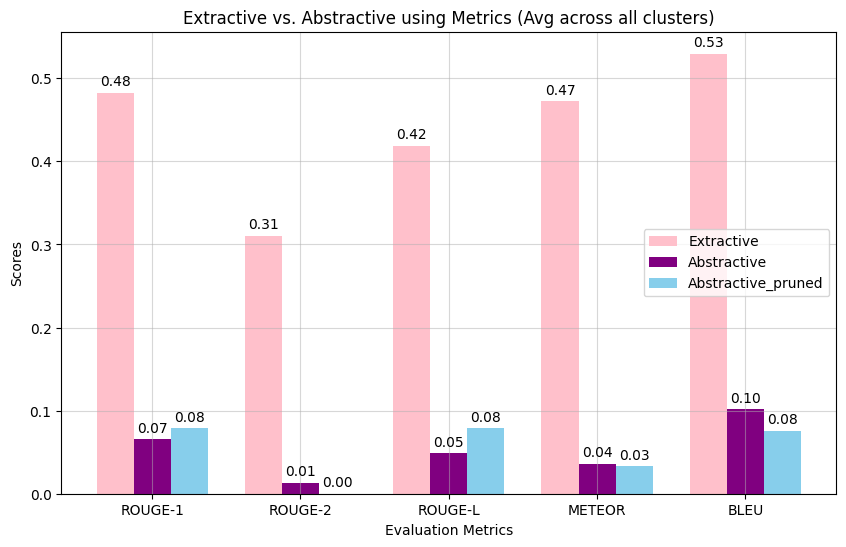

In [30]:
plot_eval_graph({'Extractive': (e_rouge1, e_rouge2, e_rougeL, e_meteor, e_bleu),
                  'Abstractive': (a_rouge1, a_rouge2, a_rougeL, a_meteor, a_bleu),
                   'Abstractive_pruned': (a_rouge1_pruned, a_rouge2_pruned, a_rougeL_pruned, a_meteor_pruned, a_bleu_pruned)})

### Summarisation comments
The extractive summarisation techniques were significantly better. The abstractive model was not trained on enough data. Some of the summaries were repetitions of 'ring', so the model was not trained enough to generalise well. Only two of the abstracted summaries were readable, so I plotted the scores for just those in an `abstractive_pruned` set. The scores only barely increased, and were in some cases worse (ROUGE-2, METEOR)

## PyTerrier attempt at NIR

In [ ]:
# !pip install transformers
# !pip install torch
# !pip install python-terrier
# !pip install git+https://github.com/terrierteam/pyterrier_colbert.git

# import pyterrier as pt
# if not pt.started():
#     pt.init()

# import os
# from transformers import AutoTokenizer, AutoModel

# from pyterrier_colbert.indexing import ColBERTIndexer
# from pyterrier_colbert.ranking import ColBERTFactory
# from collections import Counter

In [ ]:
# checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"

# def prepare_dataset(ids, clean_text, query_list, query_relevant):
#   queries=pt.new.queries(query_list, range(1, len(query_list)+1))

#   docs=[]
#   for idx in range(0,len(clean_text)):
#     if len(clean_text[idx]) >1:
#       docs.append({'docno': ids[idx], 'text': ' '.join(clean_text[idx])})
#   docs = pd.DataFrame(docs)

#   qrels = []
#   for idx, doc_ids in query_relevant.items():
#     for doc_id in doc_ids:
#       if not pd.isna(doc_id):
#         qrels.append({'qid':idx[-1], 'docno':str(int(doc_id)), 'label':1})
#   qrels = pd.DataFrame(qrels)

#   return docs, queries, qrels

# docs, queries, qrels = prepare_dataset(ids, clean_text, query_list, query_relevant)

# # !rm -rf ./pd_index
# # pd_indexer = pt.IterDictIndexer("./pd_index")
# # indexref1 = pd_indexer.index(docs.to_dict(orient="records"))

In [ ]:
# !rm -rf ./pretokindex
# iter_indexer = pt.IterDictIndexer("./pretokindex", threads=1, pretokenised=True)
# tok = AutoTokenizer.from_pretrained("bert-base-uncased")
# token_row_apply = pt.apply.toks(lambda row: Counter(tok.tokenize(row['text'])))
# index_pipe = token_row_apply >> iter_indexer
# indexref2 = index_pipe.index(docs.to_dict(orient="records"))

In [ ]:
# !rm -rf ./colbert_index
# colbert_indexer = ColBERTIndexer(
#     checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip",
#     index_root="./colbert_index",
#     index_name="colbert_index",
#     chunksize=100,
#     gpu=True
# )

# index = colbert_indexer.index(docs.to_dict(orient="records"))

In [ ]:
# import pyterrier_colbert.ranking
# colbert_factory = pyterrier_colbert.ranking.ColBERTFactory(
#     "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip", None, None)
# colbert = colbert_factory.text_scorer(doc_attr='abstract')

In [ ]:
# pipeline = pt.terrier.Retriever(index, wmodel='BM25') >> colbert
# pt.Experiment(
#     [pipeline],
#     topics,
#     qrels,
#     names=['DPH >> ColBERT'],
#     eval_metrics=["map", "ndcg", 'ndcg_cut.10', 'P.10', 'mrt']
# )

In [ ]:
# eval_metrics = ['map', 'ndcg_cut_10', 'P_10', 'recall_1000']
# eval = pt.Experiment([pipeline],
#                       queries,
#                       qrels,
#                       eval_metrics,
#                       names=['ColBERT'])

In [31]:
!pip install nbconvert &> /dev/null
!apt-get install pandoc &> /dev/null
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic &> /dev/null

In [69]:
!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/COP509cw/PartA.ipynb' --to PDF

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/COP509cw/PartA.ipynb to PDF
[NbConvertApp] Support files will be in PartA_files/
[NbConvertApp] Making directory ./PartA_files
[NbConvertApp] Writing 246191 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 391179 bytes to /content/drive/MyDrive/Colab Notebooks/COP509cw/PartA.pdf
